<h1>
<center>
Bayesian Regularization
</center>
</h1>

<h3>
<center>
Maia Tienstra <br>
Master Thesis project <br>
Date: 28, February 2022
</center>
</h3>

We refer the reader to the thesis section 6 for the derivations of the following three methods. For the analysis of the example, we refer the reading to section 7. Additional background theory required can be found in the thesis sections 1-5. 

In [1]:
from bayes_reg import*
import os


In [2]:
#run if made changes to py file

import importlib

import bayes_reg 
importlib.reload(bayes_reg)
from bayes_reg import*

In [3]:
plot_path = os.getcwd()+'/Plots/'
csv_path = os.getcwd()+'/CSV/'

## Data

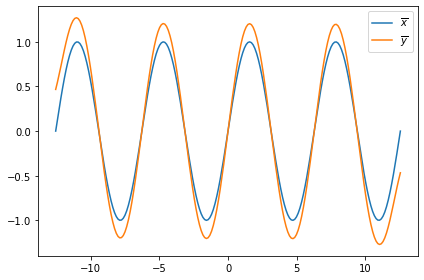

In [4]:
'''
Example Sinoid Function
'''

# parameters
n = 200
sigma = 1e-2


#t has numbers ranging from 1/400 to 1-1/400 and is of len 200
t = np.linspace(-4*np.pi, 4*np.pi, n)

# operators
A = getA(t)
L = getL(t)


# Make some data
x_bar = np.sin(t)
y_bar = A@x_bar

plt.plot(t,x_bar,label=r'$\overline{x}$')
plt.plot(t,y_bar,label=r'$\overline{y}$')
plt.legend()
plt.tight_layout()
plt.savefig(plot_path+'example.jpeg',dpi=500)
plt.show()


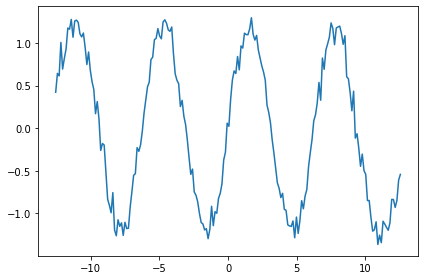

In [5]:
sigma   = 1e-1
y_delta = y_bar + sigma*np.random.randn(n)
plt.plot(t,y_delta)
plt.tight_layout()
plt.savefig(plot_path+'noisy_observations.jpeg',dpi=500)
plt.show()

### Randomly spaced points

In [6]:
# xmin, xmax, num = -4*np.pi, 4*np.pi, 200
# func = lambda x: np.sin(x) 

# # Generate evenly spaced data...
# x_even = np.linspace(xmin, xmax, num)

# # Generate randomly spaced data...
# x = np.random.random(num)
# x_rand = (xmax - xmin) * x + xmin
# x_rand = sorted(x_rand)

# # Plot the results
# fig, axes = plt.subplots(nrows=2, sharex=True)
# for x, ax in zip([x_even, x_rand], axes):
#     ax.plot(x, func(x), marker='o', mfc='red')
# axes[0].set_title('Evenly Spaced Points')
# axes[1].set_title('Randomly Spaced Points')


In [7]:
# # operators
# A = getA(x_rand)
# L = getL(x_rand)


# # Make some data
# x_bar = np.sin(x_rand)
# y_bar = A@x_bar

# plt.plot(x_rand,x_bar,label=r'$\overline{x}$')
# plt.plot(x_rand,y_bar,label=r'$\overline{y}$')
# plt.legend()
# plt.show()

In [8]:
# sigma   = 1e-1
# y_delta = y_bar + sigma*np.random.randn(n)
# plt.plot(t,y_delta)
# plt.show()

## Ill-posedness

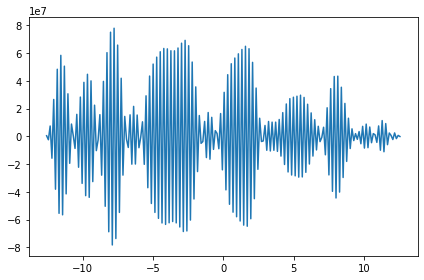

In [9]:
plt.plot(t,np.linalg.inv(A)@(y_bar-sigma*np.random.randn(n)))
plt.tight_layout()
plt.savefig(plot_path+'least_sqrs_estimate.jpeg',dpi=500)
plt.show()

### Condition number and rank of A

In [10]:
U,S,Vh = np.linalg.svd(A)

In [11]:
np.linalg.matrix_rank(A)

200

In [12]:
kappa = np.linalg.cond(A)

In [13]:
np.log10(kappa)

9.68912935204352

In [14]:
10**9.689

4886523593.428336

In [15]:
sigma_min = np.min(S)
sigma_max = np.max(S)
kappa = sigma_max/sigma_min
print('s_max:', sigma_max)
print('s_min:', sigma_min)
print('Condition number: 1 << ',kappa)

s_max: 1.9676012686895668
s_min: 4.0253879469578856e-10
Condition number: 1 <<  4887979232.353358


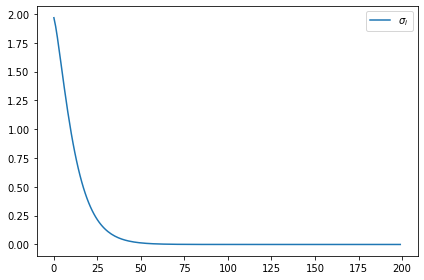

In [16]:
plt.plot(list(range(0,200)),S, label='$\sigma_i$')
plt.legend()
plt.tight_layout()
plt.savefig(plot_path+'eigen_values.jpeg',dpi=500)
plt.show()

In [17]:
x_ls = Vh.T@np.diag(1/S)@U.T@y_delta

In [18]:
np.linalg.norm(x_ls - x_bar)**2

4.526679874119036e+17

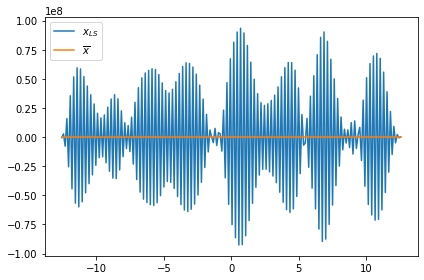

In [19]:
plt.plot(t,x_ls, label='$x_{LS}$')
plt.plot(t,x_bar, label='$\overline{x}$')
plt.legend()
plt.tight_layout()
plt.show()

### Picard Condition

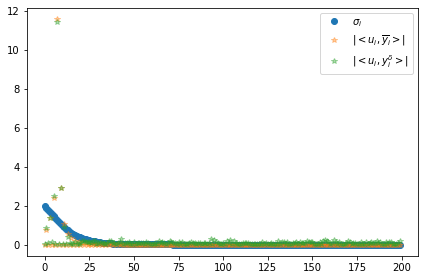

In [20]:
plt.plot(list(range(0,200)),S, 'o', label='$\sigma_i$')
plt.plot(list(range(0,200)),np.abs(U.T@y_bar),'*',alpha=0.4,label='$|<u_i, \overline{y}_i>|$')
plt.plot(list(range(0,200)), np.abs(U.T@y_delta), '*',alpha=0.4, label='$|<u_i, y^\delta_i>|$')
plt.legend()
plt.tight_layout()
plt.savefig(plot_path+'picard.jpeg',dpi=500)
plt.show()

## Regularization

We now add the following hyper priors on the precision

\begin{align}
    \alpha  &\sim Gamma(a_0,b_0)\\
    \beta  &\sim Gamma(a_1,b_1)
\end{align}


Then the posterior becomes 
\begin{align}
    p(x,\alpha, \beta \mid y) &\propto \rho(Ax-y \mid \alpha ) \times \pi(\alpha) \pi(x \mid \beta) \times \pi(\beta)\\
    & \propto \alpha^{n/2}e^{-\alpha/2 ||Ax-y||^2}\alpha^{a_0 -1}e^{-b_0 \alpha}\beta^{n/2}e^{-\beta/2||Lx||^2}\beta^{a_1 -1}e^{-b_1\beta}
\end{align}

taking the log we get
\begin{align}
    -\alpha/2||Ax-y||^2 + (n/2+a_0-1) log(\alpha)-b_0\alpha -\beta/2||Lx||^2 + (n/2+a_1-1)log(\beta)-b_1\beta
\end{align}

then the potential is 

\begin{align}
    \ell(x, \alpha, \beta \mid y) = \alpha/2||Ax-y||^2 - (n/2+a_0-1) log(\alpha)+b_0\alpha + \beta/2||Lx||^2 - (n/2+a_1-1)log(\beta)+b_1\beta
\end{align}


If we minimize the above regularized least squares over $x, \alpha, \beta$ we see that we have Tikhonov regularization with regularization parameter $\lambda = \beta/\alpha$. 

Now recall that the likelihood and priors are conjugate we have that the posterior distribution is Gaussian. This posterior distribution is maximized when the $\ell(x, \alpha, \beta \mid y)$ is minimized. So we define the following

\begin{align}
    \mathcal{J}(x,\alpha,\beta) =
    \alpha/2||Ax-y||^2 - (n/2+a_0-1)log(\alpha)+b_0\alpha + \beta/2||Lx||^2 - (n/2+a_1-1)log(\beta)+b_1\beta
\end{align}

as the objective function. In this way finding $\widehat{x}, \widehat{\alpha}, \widehat{\beta}$ is an optimization problem, which can be solved using the following. Note that if we let $a_0,a_1=1$ and $b_0,b_1=0$ the we recover the objective function given no hyper priors.

Then the partial derivatives are
\begin{align}
    \partial/\partial x(J(x,\alpha, \beta )) &= (A^*A+\beta/\alpha L^*L)x-A^*y\\
    \partial/\partial \alpha  J(x,\alpha, \beta ) &= 1/2||Ax-y||^2 -(n/2+a_0 -1)/\alpha +b_0\\
    \partial/\partial \beta  J(x,\alpha, \beta ) &= 1/2||Lx||^2 -(n/2+a_1 -1)/\beta +b_1
\end{align}

Then the optimal solutions ie when the partials are zero are 
\begin{align}
    x &= (A^*A + \beta /\alpha L^*L)^{-1}A^*y\\
    \alpha &=\frac{(n/2+a_0 -1)}{ 1/2||Ax-y||^2  + b_0}\\
    \beta &= \frac{(n/2+a_1 -1)} {1/2||Lx||^2  + b_1}
\end{align}

We propose three different iterative methods to ways to minimize $\mathcal{J}(x, \alpha, \beta)$

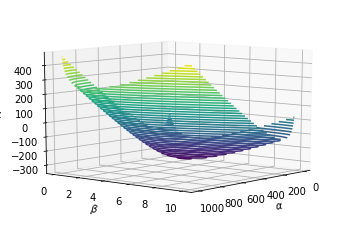

In [21]:
from mpl_toolkits import mplot3d

def f(x, y):
    return getObj(A,L,y_delta, x, y)


x = np.logspace(1,3,n)
y = np.logspace(-1,1,n)


X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_zlabel('z');

ax.view_init(10,40)

fig.savefig(plot_path+'3d_contour.jpeg',dpi=300)

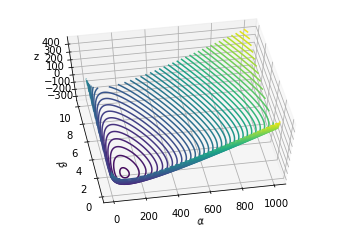

In [22]:
ax.view_init(60, 260)
fig

In [23]:
my_dict = {}
sigma   = 1e-1
y_delta = y_bar + sigma*np.random.randn(n)

### Method 1


Coordinate descent with step size 1. 

$$x_{k+1} = \widehat{x}(\beta_k/\alpha_k),$$

$$\alpha_{k+1} = \widehat{\alpha}(x_{k+1})$$

$$\beta_{k+1} = \widehat{\beta}(x_{k+1})$$

In [24]:
x_hat,alpha_hat,beta_hat,obj, df1 =Algorithm1(A,L,y_delta,print_res=True)
err = np.linalg.norm(x_bar-x_hat)**2
my_dict['Algo1']=[alpha_hat,beta_hat, beta_hat/alpha_hat, obj[-1],err,len(obj)-1]

Successful
Iterations: 4
Gradient: 2.7546493187957256e-07


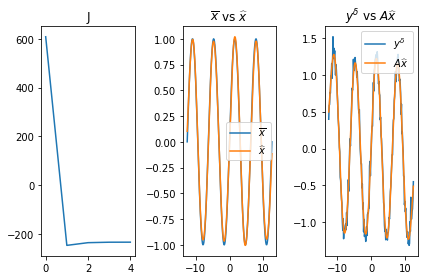

Lambda: 0.017512901197903333
Error: 0.18774943070502442
Obj val: -233.6024413797413


In [25]:
name = plot_path+'algo1'
plot_results(obj, t,A, x_bar, x_hat,alpha_hat, beta_hat, y_delta,name)

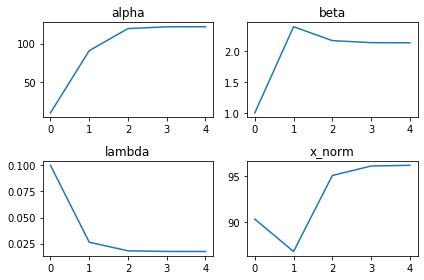

In [26]:
plot_estimates(df1,name)

In [27]:
df1.to_csv(csv_path+'algo_1')

In [28]:
df1

,x_norm,alpha,beta,lambda,obj,$||\nabla_x J||$,$||\nabla_{a} J||$,$||\nabla_{B} J||$
0,90.309909,10.000000,1.000000,0.100000,608.738770,2.173585e+07,4.906128e+01,6.990410e+02
1,86.786358,90.884524,2.399189,0.026398,-246.712383,4.478357e-01,6.767792e-33,6.374399e-30
2,95.059299,119.618868,2.173358,0.018169,-235.663277,7.431779e-03,8.268908e-34,6.374399e-30
3,96.091240,121.900073,2.140451,0.017559,-233.760750,4.732108e-05,8.268908e-34,6.374399e-30
4,96.169297,122.062116,2.137662,0.017513,-233.602441,2.754649e-07,8.268908e-34,6.374399e-30


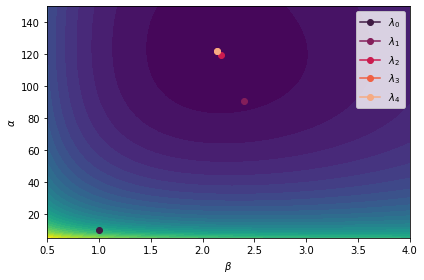

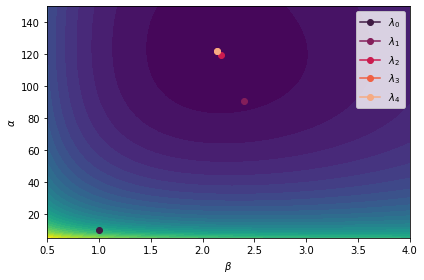

In [29]:
plot_contour(A,L, y_delta, df1, name , ranges=[5,150,0.5,4])

#### Convergence

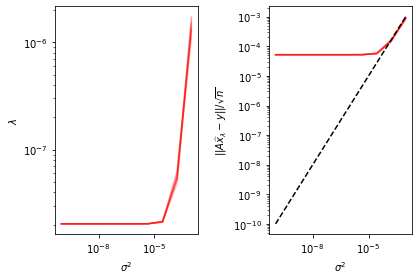

In [30]:
ns = 10
na = 10

sigmas = np.logspace(-10,-3,ns)

lmbds_map = np.zeros((ns,na))
errors    = np.zeros((ns,na))
residuals = np.zeros((ns,na))
for i in range(ns):
    for j in range(na):
        
        y_delta = y_bar + sigmas[i]*np.random.randn(n)
        x_hat, alpha_hat, beta_hat,_,_ = Algorithm1(A,L,y_delta,niter=100000,tol=1e-8)
        lmbda_hat = beta_hat / alpha_hat
        
        lmbds_map[i,j] = lmbda_hat
        errors[i,j] = np.linalg.norm(x_bar-x_hat)
        residuals[i,j] = np.linalg.norm(A@x_hat - y_delta)
        
fig,axs = plt.subplots(1,2)

axs[0].loglog(sigmas,lmbds_map,'r-',alpha=.2)
axs[0].set_xlabel(r'$\sigma^2$')
axs[0].set_ylabel(r'$\lambda$')

axs[1].loglog(sigmas,residuals/np.sqrt(n),'r-',alpha=0.2)
axs[1].loglog(sigmas,sigmas,'k--')
axs[1].set_xlabel(r'$\sigma^2$')
axs[1].set_ylabel(r'$||A\widehat{x}_\lambda - y||/\sqrt{n}$')
plt.tight_layout()
plt.savefig(plot_path+'consis_convg.jpeg',dpi=500)
plt.show()

#### Sensitivity 

In [31]:
y_delta = y_bar + sigma*np.random.randn(n)

Successful
Iterations: 3
Gradient: 3.0613130700604486e-09


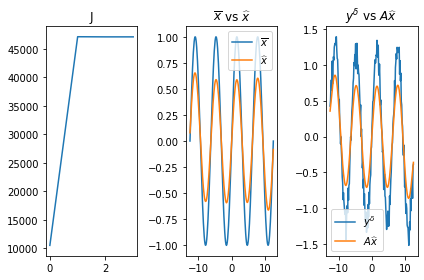

Lambda: 0.9994596058387455
Error: 15.344034629846432
Obj val: 47086.28433207164
Successful
Iterations: 7
Gradient: 5.373306225367179e-07


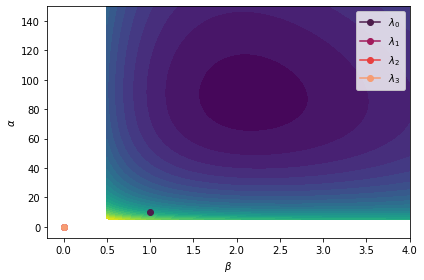

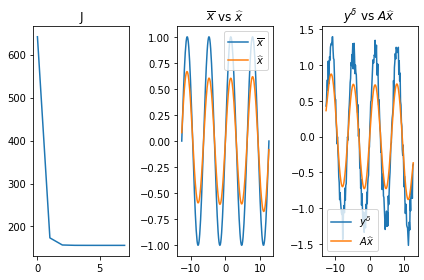

Lambda: 0.9405068624869377
Error: 14.264391174426423
Obj val: 156.0217432422438
Successful
Iterations: 4
Gradient: 2.6054638284827516e-06


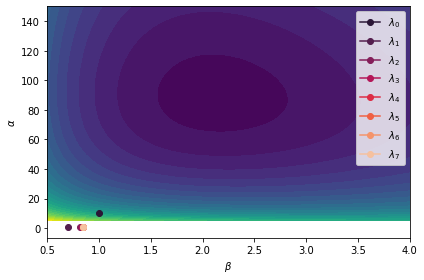

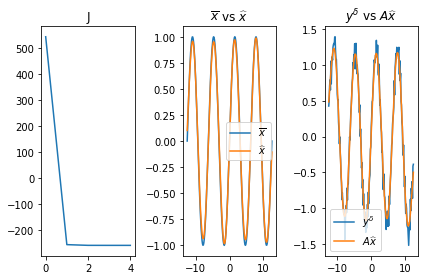

Lambda: 0.0477189933235198
Error: 0.2469318158964308
Obj val: -259.51364709969914
Successful
Iterations: 4
Gradient: 1.4409869546730307e-06


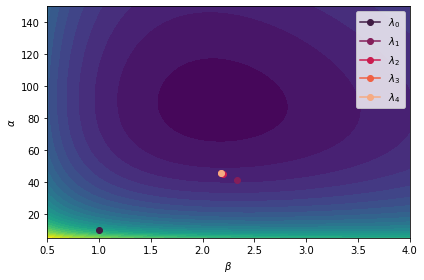

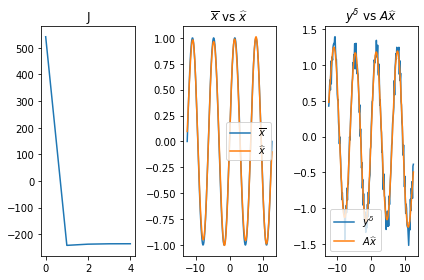

Lambda: 0.02423231809099294
Error: 0.1811003423003164
Obj val: -235.47791326539183
Successful
Iterations: 4
Gradient: 1.4359281884320504e-06


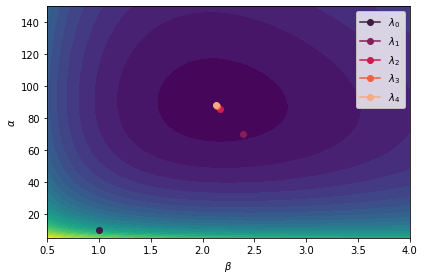

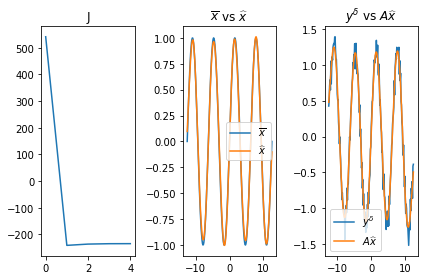

Lambda: 0.02400151942245765
Error: 0.1808276651472569
Obj val: -234.67801851477617
Successful
Iterations: 4
Gradient: 1.435879117756607e-06


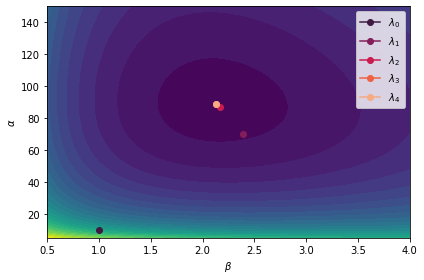

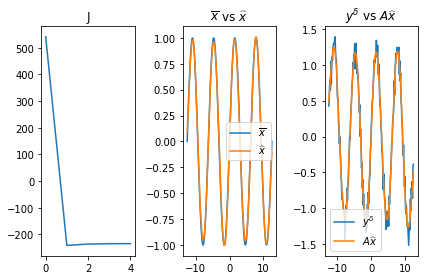

Lambda: 0.02399921176159135
Error: 0.18082499069071806
Obj val: -234.66990230991954
Successful
Iterations: 4
Gradient: 1.4358786272071785e-06


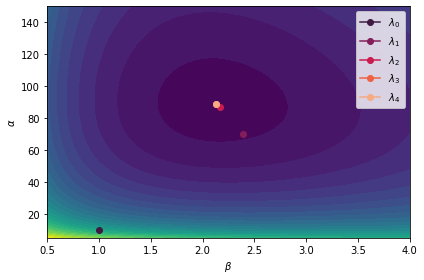

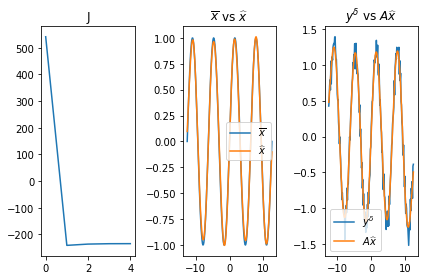

Lambda: 0.023999188685012544
Error: 0.18082496395142253
Obj val: -234.66982113601753


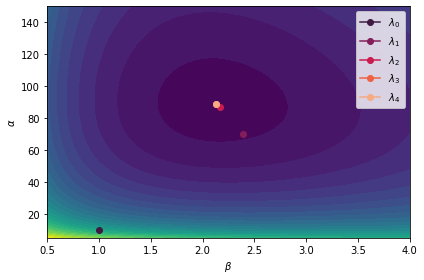

In [81]:
b_s = [1e4, 1e2, 1, 1e-2, 1e-4,1e-6, 1e-8]

sensitivity_dict = {}
for i in b_s:
    hyper_priors = [1+1e-6, i, 1+1e-6, i]
    
    x_hat,alpha_hat,beta_hat,obj, df =Algorithm1(A,L,y_delta,hyper_priors,print_res=True)
    
    err = np.linalg.norm(x_bar-x_hat)**2
    
    sensitivity_dict['b_0 : '+str(i)] = [alpha_hat,beta_hat, beta_hat/alpha_hat, obj[-1],
                                               err,len(obj)-1,df]
    name = plot_path+'b_0 : '+str(i)
    plot_results(obj, t,A, x_bar, x_hat,alpha_hat, beta_hat, y_delta,name)
    plot_contour(A,L, y_delta, df, name , ranges=[5,150,0.5,4])
    

In [82]:
sens_df = pd.DataFrame.from_dict(sensitivity_dict, orient='index')
sens_df.columns=['alpha','beta','lambda','obj','$||\overline{x}-\hat{x}||^2_2$','niter','df']
sens_df = sens_df.round(4)
sens_df_prime = sens_df[['alpha','beta','lambda','obj','$||\overline{x}-\hat{x}||^2_2$','niter']]
sens_df_prime.style.set_properties(subset=['$||\overline{x}-\hat{x}||^2_2$'], **{'width': '100px'})

,alpha,beta,lambda,obj,$||\overline{x}-\hat{x}||^2_2$,niter
b_0 : 10000.0,0.009988,0.009982,0.999460,47086.284332,15.344035,3
b_0 : 100.0,0.896728,0.843379,0.940507,156.021743,14.264391,7
b_0 : 1,45.548666,2.173537,0.047719,-259.513647,0.246932,4
b_0 : 0.01,87.911316,2.130295,0.024232,-235.477913,0.181100,4
b_0 : 0.0001,88.729453,2.129642,0.024002,-234.678019,0.180828,4
b_0 : 1e-06,88.737711,2.129635,0.023999,-234.669902,0.180825,4
b_0 : 1e-08,88.737793,2.129635,0.023999,-234.669821,0.180825,4


In [83]:
print(sens_df[['alpha','beta','lambda','obj','$||\overline{x}-\hat{x}||^2_2$','niter']].to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &      alpha &      beta &    lambda &           obj &  \$||\textbackslash overline\{x\}-\textbackslash hat\{x\}||\textasciicircum 2\_2\$ &  niter \\
\midrule
b\_0 : 10000.0 &   0.009988 &  0.009982 &  0.999460 &  47086.284332 &                       15.344035 &      3 \\
b\_0 : 100.0   &   0.896728 &  0.843379 &  0.940507 &    156.021743 &                       14.264391 &      7 \\
b\_0 : 1       &  45.548666 &  2.173537 &  0.047719 &   -259.513647 &                        0.246932 &      4 \\
b\_0 : 0.01    &  87.911316 &  2.130295 &  0.024232 &   -235.477913 &                        0.181100 &      4 \\
b\_0 : 0.0001  &  88.729453 &  2.129642 &  0.024002 &   -234.678019 &                        0.180828 &      4 \\
b\_0 : 1e-06   &  88.737711 &  2.129635 &  0.023999 &   -234.669902 &                        0.180825 &      4 \\
b\_0 : 1e-08   &  88.737793 &  2.129635 &  0.023999 &   -234.669821 &                        0.180825 &      4 \\
\botto

Successful
Iterations: 4
Gradient: 7.535996135914997e-07


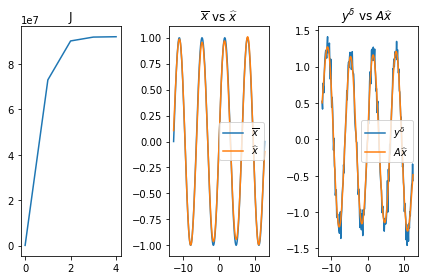

Lambda: 0.02354846406006575
Error: 0.17853998666385215
Obj val: 92002861.56339242
Successful
Iterations: 4
Gradient: 7.535996144960357e-07


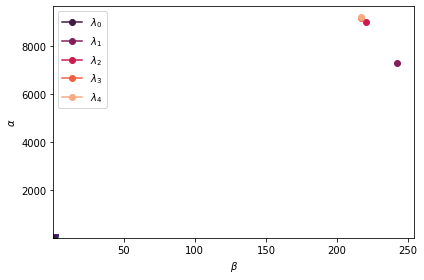

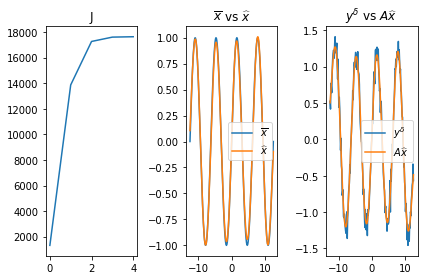

Lambda: 0.02354846406006848
Error: 0.1785399866639499
Obj val: 17627.850353097787
Successful
Iterations: 4
Gradient: 7.535996121708287e-07


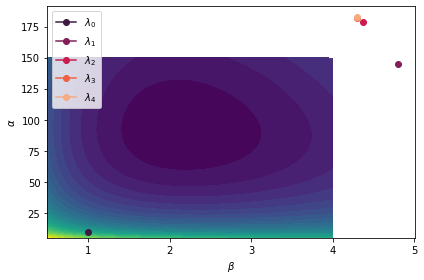

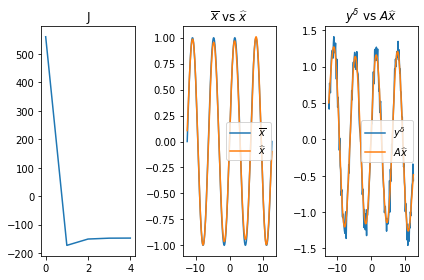

Lambda: 0.023548464060062592
Error: 0.17853998666369672
Obj val: -147.24849215853214
Successful
Iterations: 4
Gradient: 7.535996131724555e-07


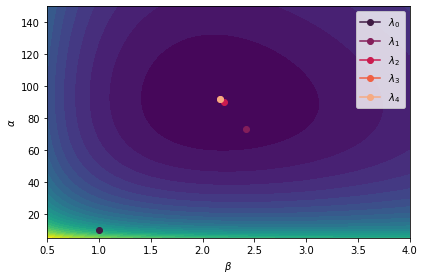

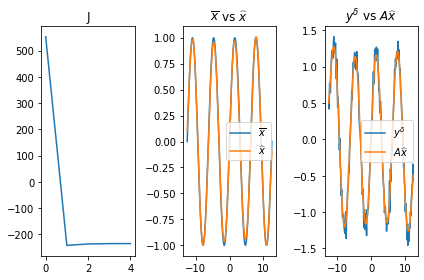

Lambda: 0.023548464060065753
Error: 0.17853998666385215
Obj val: -234.84786375313874
Successful
Iterations: 4
Gradient: 7.535996140628394e-07


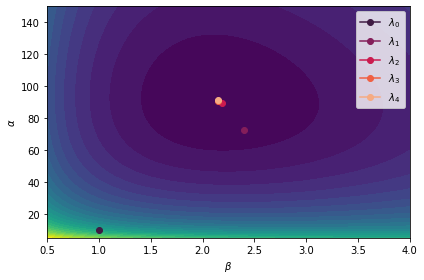

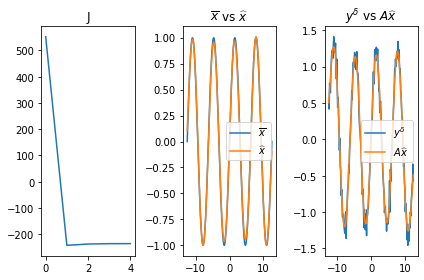

Lambda: 0.02354846406006821
Error: 0.17853998666394819
Obj val: -235.71483471971945
Successful
Iterations: 4
Gradient: 7.535996138058948e-07


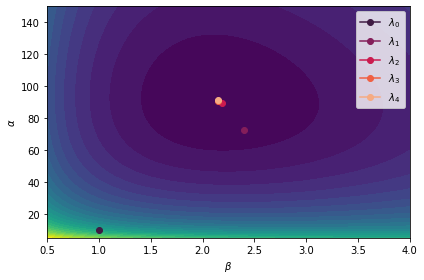

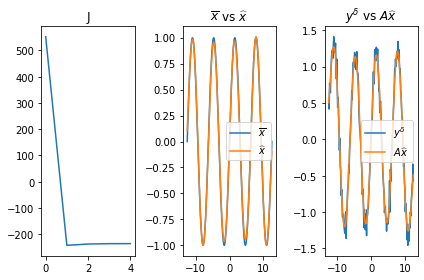

Lambda: 0.023548464060062634
Error: 0.17853998666370596
Obj val: -235.72350352708366
Successful
Iterations: 4
Gradient: 7.535996145432037e-07


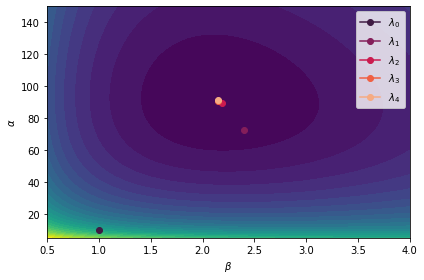

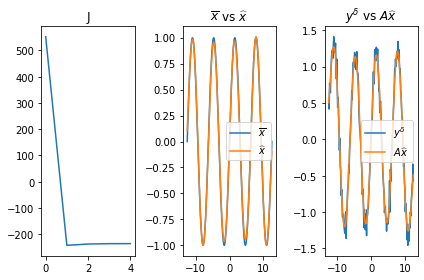

Lambda: 0.023548464060068205
Error: 0.17853998666394819
Obj val: -235.72359021507782


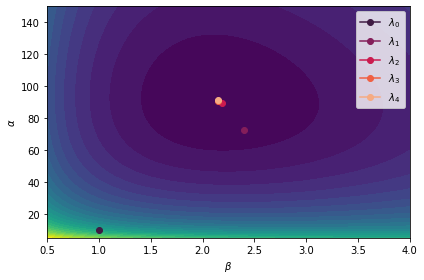

In [35]:
a_s = [1e4, 1e2, 1, 1e-2, 1e-4,1e-6, 1e-8]

sensitivity_dict = {}
for i in a_s:
    hyper_priors = [1+i, 1e-6, 1+i, 1e-6]
    
    x_hat,alpha_hat,beta_hat,obj, df =Algorithm1(A,L,y_delta,hyper_priors, print_res=True)
    
    err = np.linalg.norm(x_bar-x_hat)**2
    
    sensitivity_dict['a_0 : 1+'+str(i)] = [alpha_hat,beta_hat, beta_hat/alpha_hat, obj[-1],
                                               err,len(obj)-1,df]
    name = plot_path+'a_0 : '+str(i)
    plot_results(obj, t,A, x_bar, x_hat,alpha_hat, beta_hat, y_delta,name)
    plot_contour(A,L, y_delta, df, name , ranges=[5,150,0.5,4])

In [36]:
sens_df = pd.DataFrame.from_dict(sensitivity_dict, orient='index')
sens_df.columns=['alpha','beta','lambda','obj','$||\overline{x}-\hat{x}||^2_2$','niter','df']
sens_df = sens_df.round(4)
sens_df_prime = sens_df[['alpha','beta','lambda','obj','$||\overline{x}-\hat{x}||^2_2$','niter']]
sens_df_prime.style.set_properties(subset=['$||\overline{x}-\hat{x}||^2_2$'], **{'width': '100px'})

,alpha,beta,lambda,obj,$||\overline{x}-\hat{x}||^2_2$,niter
a_0 : 1+10000.0,9206.617700,216.801700,0.023500,92002861.563400,0.178500,4
a_0 : 1+100.0,182.309300,4.293100,0.023500,17627.850400,0.178500,4
a_0 : 1+1,92.066200,2.168000,0.023500,-147.248500,0.178500,4
a_0 : 1+0.01,91.163700,2.146800,0.023500,-234.847900,0.178500,4
a_0 : 1+0.0001,91.154700,2.146600,0.023500,-235.714800,0.178500,4
a_0 : 1+1e-06,91.154600,2.146600,0.023500,-235.723500,0.178500,4
a_0 : 1+1e-08,91.154600,2.146600,0.023500,-235.723600,0.178500,4


In [80]:
print(sens_df[['alpha','beta','lambda','obj','$||\overline{x}-\hat{x}||^2_2$','niter']].to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &      alpha &      beta &  lambda &           obj &  \$||\textbackslash overline\{x\}-\textbackslash hat\{x\}||\textasciicircum 2\_2\$ &  niter \\
\midrule
a\_0 : 1+10000.0 &  9206.6177 &  216.8017 &  0.0235 &  9.200286e+07 &                          0.1785 &      4 \\
a\_0 : 1+100.0   &   182.3093 &    4.2931 &  0.0235 &  1.762785e+04 &                          0.1785 &      4 \\
a\_0 : 1+1       &    92.0662 &    2.1680 &  0.0235 & -1.472485e+02 &                          0.1785 &      4 \\
a\_0 : 1+0.01    &    91.1637 &    2.1468 &  0.0235 & -2.348479e+02 &                          0.1785 &      4 \\
a\_0 : 1+0.0001  &    91.1547 &    2.1466 &  0.0235 & -2.357148e+02 &                          0.1785 &      4 \\
a\_0 : 1+1e-06   &    91.1546 &    2.1466 &  0.0235 & -2.357235e+02 &                          0.1785 &      4 \\
a\_0 : 1+1e-08   &    91.1546 &    2.1466 &  0.0235 & -2.357236e+02 &                          0.1785 &      4 \\
\bottomr

In [67]:
def my_func(a,b,x):
    return (a*x)-(b*np.log(x))

In [68]:
x = np.linspace(0.1,5,100)

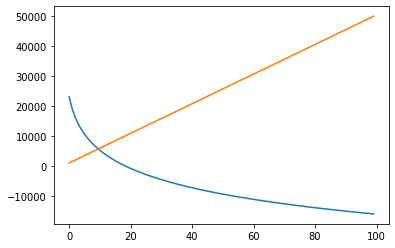

In [78]:
plt.plot(list(range(100)),my_func(10,10000,x))
plt.plot(list(range(100)),my_func(10000,1,x))

Comment: at some choices of hyperpriors we get concavity? 

### Method 2


Something in between coordinate and gradient descent 

$$\min_{\alpha,\beta} J_2(\alpha,\beta),$$

with 

$$J_2(\alpha,\beta) = \min_x \alpha/2 \|Ax - y\|^2 + \beta/2 \|Lx\|^2 - (n/2+a_0 -1)\log \alpha + b_0 - (n/2+a_1 -1)\log\beta + b_1$$

with a gradient method

$$\alpha_{k+1} = \alpha_k - \mu \partial_{\alpha} J_2(\alpha_k,\beta_k),$$
$$\beta_{k+1} = \beta_k - \mu \partial_{\beta} J_2(\alpha_k,\beta_k),$$


where

$$\partial_{\alpha} J_2 = 1/2\|A\widehat{x}(\beta/\alpha) - y\|^2 - (n/2+a_0 -1)/\alpha +b_0,$$

$$\partial_{\beta} J_2 = 1/2\|L\widehat{x}(\beta/\alpha)\|^2 - (n/2+a_1 -1)/\beta +b_1,$$


In [37]:
sigma   = 1e-1
y_delta = y_bar + sigma*np.random.randn(n)
x_hat,alpha_hat,beta_hat,obj,df2 = Algorithm2(A,L,y_delta,mu_a = 1e-1,mu_b=1e-3, print_res=True)

err = np.linalg.norm(x_bar-x_hat)**2

my_dict['Algo2']=[alpha_hat,beta_hat,beta_hat/alpha_hat, obj[-1],err,len(obj)-1]

Successful
Iterations: 6598
Gradient: 9.989697249808324e-06


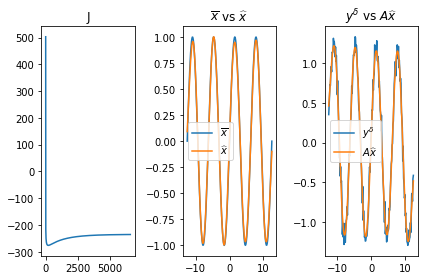

Lambda: 0.018443243477221222
Error: 0.18871207147967933
Obj val: -235.73951433772476


In [38]:
name = plot_path+'algo2'
plot_results(obj, t,A, x_bar, x_hat,alpha_hat, beta_hat, y_delta,name)

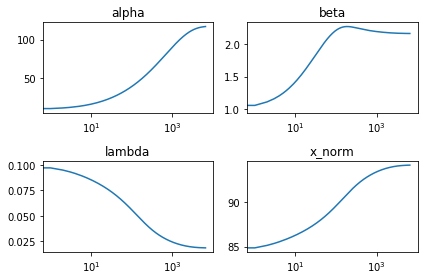

In [39]:
plot_estimates(df2,name)

In [40]:
df2.to_csv(csv_path+'algo_2')

In [41]:
# np.unique(np.logspace(0, 5, 20).astype(np.int))

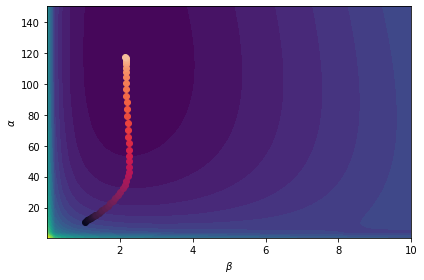

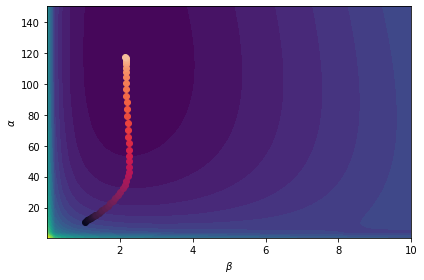

In [42]:
plot_contour(A,L, y_delta, df2, name)

### Method 3

Gradient descent

$$\min_x J_3(x),$$

$$J_3(x) = J(x,\widehat{\alpha}(x),\widehat{\beta}(x)) = \widehat{\alpha}(x)/2||Ax -y||^2 - (n/2+a_0 -1)log( \widehat{\alpha}(x)) -  b_0\widehat{\alpha}(x) + \widehat{\beta}(x)/2||Lx||^2 - (n/2+a_1 -1)log( \widehat{\beta}(x)) + b_1 \widehat{\beta}(x)$$

solved as

$$x_{k+1} = x_k - \mu \nabla_x J_3(x_k),$$

with

$$\nabla_x J_3(x) = (A^*A+\widehat{\beta}(x)/\widehat{\alpha}(x)L^*L)y-A^Tx$$

In [43]:
sigma   = 1e-1
y_delta = y_bar + sigma*np.random.randn(n)
x_hat,alpha_hat,beta_hat,obj,df3 = Algorithm3(A,L, y_delta,mu=1e-3,print_res=True)
err = np.linalg.norm(x_bar-x_hat)**2
my_dict['Algo3']=[alpha_hat,beta_hat,beta_hat/alpha_hat,obj[-1],err, len(obj)-1]

Successful
Iterations: 6302
Gradient: 9.98953211921656e-06


In [44]:
np.where(df3['x_norm'] == np.min(df3['x_norm']))

(array([147]),)

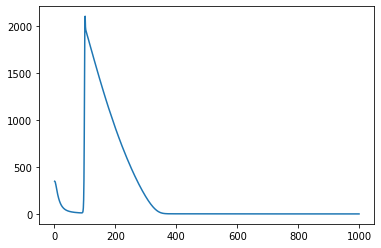

In [45]:
plt.plot(df3['$||\nabla_x J||$'][1:1000])

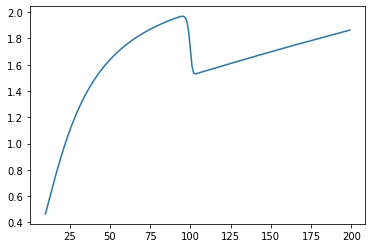

In [46]:
plt.plot(range(10,200), df3["beta"][10:200])

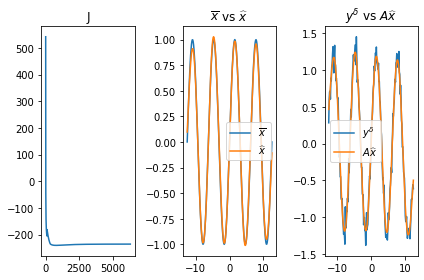

Lambda: 0.01987926034437907
Error: 0.20618819937059019
Obj val: -235.74297482400138


In [47]:
name = plot_path+'algo3'
plot_results(obj, t,A, x_bar, x_hat,alpha_hat, beta_hat, y_delta,name)

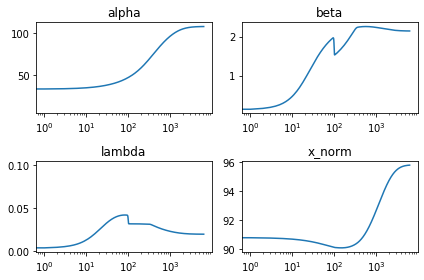

In [48]:
plot_estimates(df3,name)

In [49]:
df3.to_csv(csv_path+'algo_3')

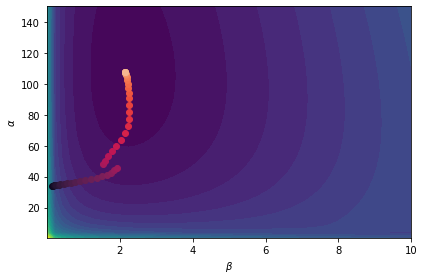

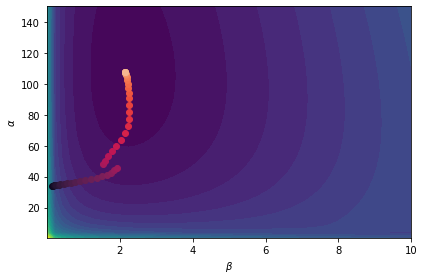

In [50]:
plot_contour(A,L, y_delta, df3, name ,ns=50)

### Method 4

In [51]:
sigma   = 1e-1
y_delta = y_bar + sigma*np.random.randn(n)
x_hat,alpha_hat,beta_hat,obj, df4 = Algorithm4(A,L, y_delta,print_res=True)
err = np.linalg.norm(x_bar-x_hat)**2
my_dict['Algo4']=[alpha_hat,beta_hat,beta_hat/alpha_hat,obj[-1],err,len(obj)-1]

Successful
Iterations: 4
Gradient: 1.452653645600373e-06
0


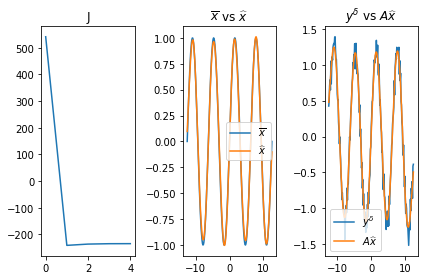

Lambda: 0.023999231370423937
Error: 0.18082191887833216
Obj val: -234.66993803863116


In [52]:
name = plot_path+'algo4'
plot_results(obj, t,A, x_bar, x_hat,alpha_hat, beta_hat, y_delta,name)

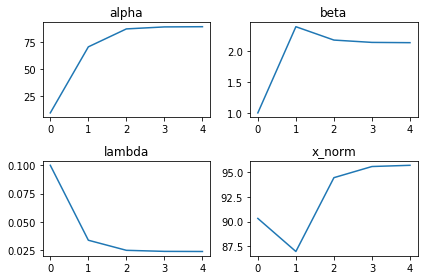

In [53]:
plot_estimates(df4,name)

In [54]:
df4.to_csv(csv_path+'algo_4')

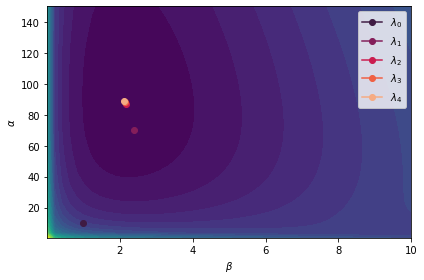

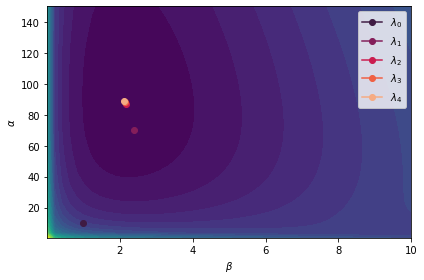

In [55]:
plot_contour(A,L, y_delta, df4, name ,ns=50)

## Results 

In [56]:
algo_df = pd.DataFrame.from_dict(my_dict, orient='index')
algo_df.columns=['alpha','beta','lambda','obj','$||\overline{x}-\hat{x}||^2_2$','niter']
algo_df = algo_df.round(5)
algo_df.style.set_properties(subset=['$||\overline{x}-\hat{x}||^2_2$'], **{'width': '100px'})

,alpha,beta,lambda,obj,$||\overline{x}-\hat{x}||^2_2$,niter
Algo1,122.062120,2.137660,0.017510,-233.602440,0.187750,4
Algo2,117.016660,2.158170,0.018440,-235.739510,0.188710,6598
Algo3,107.867970,2.144340,0.019880,-235.742970,0.206190,6302
Algo4,88.737670,2.129640,0.024000,-234.669940,0.180820,4


In [61]:
print(algo_df.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &      alpha &     beta &   lambda &        obj &  \$||\textbackslash overline\{x\}-\textbackslash hat\{x\}||\textasciicircum 2\_2\$ &  niter \\
\midrule
Algo1 &  122.06212 &  2.13766 &  0.01751 & -233.60244 &                         0.18775 &      4 \\
Algo2 &  117.01666 &  2.15817 &  0.01844 & -235.73951 &                         0.18871 &   6598 \\
Algo3 &  107.86797 &  2.14434 &  0.01988 & -235.74297 &                         0.20619 &   6302 \\
Algo4 &   88.73767 &  2.12964 &  0.02400 & -234.66994 &                         0.18082 &      4 \\
\bottomrule
\end{tabular}



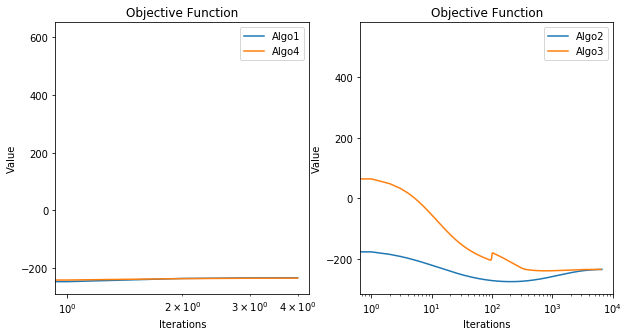

In [58]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(np.arange(len(df1['obj'].to_numpy())),df1['obj'].to_numpy(), label='Algo1')
ax[0].plot(np.arange(len(df4['obj'].to_numpy())),df4['obj'].to_numpy(), label='Algo4')
ax[0].set_xscale('log')
ax[0].set_title('Objective Function')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Value')
ax[0].legend()
ax[1].plot(np.arange(len(df2['obj'].to_numpy())),df2['obj'].to_numpy(),label='Algo2')
ax[1].plot(np.arange(len(df3['obj'].to_numpy())),df3['obj'].to_numpy(), label='Algo3')
ax[1].set_xscale('log')
ax[1].set_title('Objective Function')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Value')
ax[1].legend()

fig.savefig(plot_path+'obj_func.jpeg',dpi=300)
plt.show()

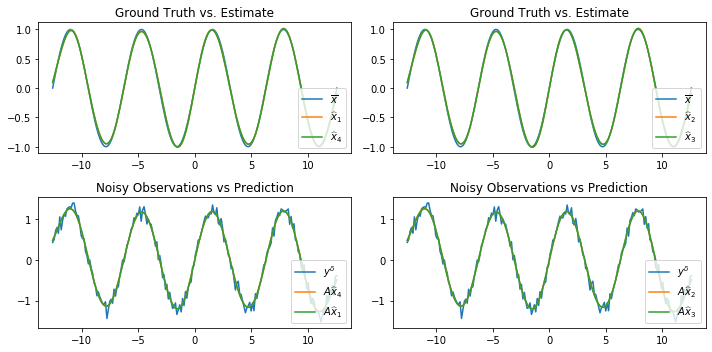

In [59]:
x_hat1 = np.linalg.solve(A.T@A + (df1['lambda'].to_numpy()[-1])*L.T@L, A.T@y_delta)
x_hat2 = np.linalg.solve(A.T@A + (df2['lambda'].to_numpy()[-1])*L.T@L, A.T@y_delta)
x_hat3 = np.linalg.solve(A.T@A + (df3['lambda'].to_numpy()[-1])*L.T@L, A.T@y_delta)
x_hat4 = np.linalg.solve(A.T@A + (df4['lambda'].to_numpy()[-1])*L.T@L, A.T@y_delta)


fig, ax = plt.subplots(2,2, figsize=(10,5))

ax[0,0].plot(t,x_bar,label='$\overline{x}$')
ax[0,0].plot(t,x_hat1,label='$\widehat{x}_1$')
ax[0,0].plot(t,x_hat4,label='$\widehat{x}_4$')
ax[0,0].set_title('Ground Truth vs. Estimate')

ax[0,1].plot(t,x_bar,label='$\overline{x}$')
ax[0,1].plot(t,x_hat2,label= '$\widehat{x}_2$')
ax[0,1].plot(t,x_hat3,label='$\widehat{x}_3$')
ax[0,1].set_title('Ground Truth vs. Estimate')

ax[0,0].legend(loc='lower right')
ax[0,1].legend(loc='lower right')

ax[1,0].plot(t,y_delta,label=r'$y^\delta$')
ax[1,0].plot(t,A@x_hat4,label=r'$A\widehat{x}_4$')
ax[1,0].plot(t,A@x_hat1,label=r'$A\widehat{x}_1$')
ax[1,0].set_title('Noisy Observations vs Prediction')

ax[1,1].plot(t,y_delta,label=r'$y^\delta$')
ax[1,1].plot(t,A@x_hat2,label=r'$A\widehat{x}_2$')
ax[1,1].plot(t,A@x_hat3,label=r'$A\widehat{x}_3$')
ax[1,1].set_title('Noisy Observations vs Prediction')

ax[1,0].legend(loc='lower right')
ax[1,1].legend(loc='lower right')

plt.tight_layout()
fig.savefig(plot_path+'results_summary.jpeg',dpi=300)

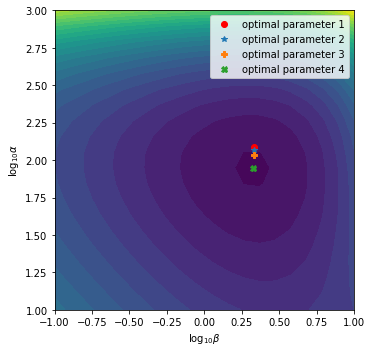

In [60]:
ns = 20

#theta = [alpha, beta]
obj = lambda theta : getObj(A,L,y_delta, theta[0], theta[1])


alphas = np.logspace(1,3,ns)
betas = np.logspace(-1,1,ns)


objs = np.zeros((ns,ns))

#solves for x_hat by using the previous alpha[i], beta[j]
for i in range(ns):
    for j in range(ns):
        objs[i,j] = obj([alphas[i],betas[j]])


fig, axs = plt.subplots(1,1,figsize=(10,5))

axs.contourf(np.log10(betas),np.log10(alphas),objs,levels=30)
axs.set_xlabel(r'$\log_{10} \beta$')
axs.set_ylabel(r'$\log_{10} \alpha$')

axs.plot(np.log10(df1['beta'].to_numpy()[-1]),np.log10(df1['alpha'].to_numpy()[-1]),'ro',label='optimal parameter 1')
axs.plot(np.log10(df2['beta'].to_numpy()[-1]),np.log10(df2['alpha'].to_numpy()[-1]),'*',label='optimal parameter 2')
axs.plot(np.log10(df3['beta'].to_numpy()[-1]),np.log10(df3['alpha'].to_numpy()[-1]),'P',label='optimal parameter 3' )
axs.plot(np.log10(df4['beta'].to_numpy()[-1]),np.log10(df4['alpha'].to_numpy()[-1]),'X',label='optimal parameter 4')

#axs.plot(np.log10(betas),np.log10(alpha_hat*(betas/beta_hat)),'w--')
axs.set_xlim(np.log10(betas[0]),np.log10(betas[-1]))
axs.set_ylim(np.log10(alphas[0]),np.log10(alphas[-1]))
axs.set_aspect(1)
axs.legend()


fig.set_figwidth(10)
fig.tight_layout()
fig.savefig(plot_path+'results_contour.jpeg',dpi=300)
